In [1]:
from sklearn.datasets import load_iris
import numpy as np
iris_data = load_iris()
X = iris_data.data[:, 3:] # 팬시색인은 차원축소 # 슬라이싱은 차원축소 없음 2차원이 필요함 # 꽃입의 너비
y = (iris_data['target']==2).astype(np.int) # 다항(3개) -> 이진분류를 위해 불리언색인 Virginica이면 1, 아니면 0로 변환

In [2]:
print(f'type(iris_data) : {type(iris_data)}')
print(f'iris_data.keys() : {iris_data.keys()}')
print(f'iris_data.data : {iris_data.data.shape}')
print(f'X.shape : {X.shape}')
print(f'y.shape : {y.shape}')
print(f'X[:5]:\n{X[:5]}')

type(iris_data) : <class 'sklearn.utils.Bunch'>
iris_data.keys() : dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
iris_data.data : (150, 4)
X.shape : (150, 1)
y.shape : (150,)
X[:5]:
[[0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.2]]


In [3]:
# 계층적 샘플링(Stratified Sampling)  훈련데이터와 시험데이터를 라벨별 비율을 유지하면서 나눔
# 지금 X데이터들이 0.2만 일련순으로 있으므로 훈련데이터 섞는데 있어 폴드를 사용해야 함
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=42)
print(f'type(sss) : {type(sss)}')
print(f'sss.get_n_splits(X,y) : {sss.get_n_splits(X,y)}')

# KFold객체의 split( ) 호출하면 폴드 별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환 
print(f'type sss.split(X,y) : {type(sss.split(X,y))}') # <class 'generator'>
for train_index, test_index in sss.split(X,y):
    print(f'train_index : {train_index}\n, test_index:{test_index}')
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]  
print(f'X_train[:5] :\n {X_train[:5]}')

type(sss) : <class 'sklearn.model_selection._split.StratifiedShuffleSplit'>
sss.get_n_splits(X,y) : 3
type sss.split(X,y) : <class 'generator'>
train_index : [ 33 106  54  55  19 146  25 133 135 117 105  48  62  58  43  11   0 108
 137  69  81  77 131  80  89 103 111  22 121  16  93   8  68  31 139 148
  49  61 144  56   4  13  88 130  28  44 101  65  76  18  45  50 100  57
  15 149  17 136  12 142  85  32 113  26  38  46 122  59  78 115  53  35
  30 119  64 129   3 145 123  94  42 114  24  66 120  10 109  41  97  70
  75 110  40  83 124 118 112  98 126  72 143  95 125 102  39   6  99  27
  34  67  96 128  36  79  47  73   5   9   7  90]
, test_index:[ 87 127  86  82  21  20  84   1 147  74 107 141 104  14  52  29   2  71
  91 138  63 140  51 134 132  60  92  37 116  23]
train_index : [  5  89 104 139 110 107 149 109  51  68  93  88  25  87 134  90   3  24
  72  46 106  55  64  22  74  35 114  37 145  97   4 120  99  85  15  76
  39 117  69 143  54  44 126  52 136  62  71  82 146  12 1

In [4]:
#StratifiedShuffleSplit?

In [5]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [6]:
log_reg.score(X_test, y_test)

0.9666666666666667

In [7]:
log_reg.predict(X_test[16:20])

array([1, 0, 0, 1])


## 꽃잎의 너비가 0 - 3cm인 꽃에 대해 선형 결정 경계 찾기

In [12]:
x_new = np.linspace(0, 3, 1000).reshape(-1,1)
y_proba = log_reg.predict_proba(x_new) #예측값을 확률로 반환
print(f'y_proba\n{y_proba}, y_proba.shape(y_proba):{y_proba.shape}')

y_proba
[[0.99891328 0.00108672]
 [0.99890007 0.00109993]
 [0.9988867  0.0011133 ]
 ...
 [0.00529462 0.99470538]
 [0.00523129 0.99476871]
 [0.00516873 0.99483127]], y_proba.shape(y_proba):(1000, 2)


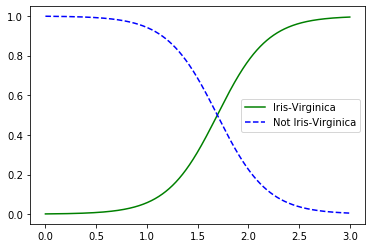

In [17]:
import matplotlib.pyplot as plt
plt.plot(x_new, y_proba[:,1], 'g-', label='Iris-Virginica')
plt.plot(x_new, y_proba[:,0], 'b--', label='Not Iris-Virginica')
plt.legend(loc='best')

In [30]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])


## 다항 로지스틱 회귀(소프트맥스 회귀)

In [20]:
from sklearn.datasets import load_iris
import numpy as np
iris = load_iris()
X = iris["data"][:, (2,3)] #petal length, petal width
y = iris["target"]
print(X[:5], X.shape)

[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]] (150, 2)


In [28]:
softmax_reg = LogisticRegression(multi_class = "multinomial", solver="lbfgs", C=10, verbose=1) # c L2 규제, 
softmax_reg.fit(X,y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=1,
                   warm_start=False)

In [29]:
softmax_reg.coef_ #

array([[-4.58614563, -2.24129385],
       [ 0.16068263, -2.15860167],
       [ 4.425463  ,  4.39989552]])

In [27]:
softmax_reg.intercept_

array([ 18.87514796,   6.3844344 , -25.25958236])

In [24]:
softmax_reg.predict_proba([[5,2]]) # 확률 반환

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

In [25]:
softmax_reg.predict([[5,2]]) # 인덱스 반환

array([2])